# **Analyze Box Office Data with Plotly and Python**

*[Based on Coursera Project Network : Analyze Box Office Data with Plotly and Python](https://www.coursera.org/learn/analyze-data-plotly-python/home/welcome)*


*by Abdurrahman Shiddiq Thaha*

*September 2020*

---

## Content

1. Business Understanding
    * Objective
    * Description
2. Data Understanding
    * Import Libraries
    * Load data
3. Exploratory Data Analysis

# 1. Business Understanding

## 1.1 Objective
* Produce interactive data visualizations with Plotly Python.
* Use Plotly Python and Seaborn during EDA and feature engineering.

## 1.2 Description
I will uses a third-party tool, Analyze Box Office Data with Plotly and Python, to enhance my learning experience.

to accomplish that i will do these following tasks:

* Analyzing Movie Release Dates
* Preprocessing Features
* Create Features Based on Release Date
* Using Plotly to Visualize the Number of Films Per Year
* Number of Films and Revenue Per Year
* Do Release Days Impact Revenue?
* Relationship between Runtime and Revenue


# 2. Data Understanding

## 2.1 Import Libraries

In [31]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-dark')

# to execute all of the syntaxes given in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

## 2.2 Load Data

We are going to work with the revenue data from box offices globally gathered by [the movie DB (TMDB)](https://www.themoviedb.org/). The 2 datasets that we will use have been collected from the API of TMDB website and was initially released as datasets for regression type problem. It contains about 7400 movies and a variety of meta data.


**train.csv**: the dataset used for training your model (regression)

**test.csv**: the dataset used for testing your model

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head(3)
train.shape

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

(3000, 203)

# Exploratory Data Analysis

### Looking at the target distribution

(array([1.455e+03, 3.790e+02, 2.070e+02, 1.520e+02, 1.000e+02, 9.900e+01,
        8.700e+01, 6.500e+01, 4.500e+01, 4.300e+01, 5.200e+01, 2.700e+01,
        2.900e+01, 2.200e+01, 2.200e+01, 1.700e+01, 2.000e+01, 9.000e+00,
        1.200e+01, 8.000e+00, 1.100e+01, 1.100e+01, 7.000e+00, 1.600e+01,
        1.100e+01, 6.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        6.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

Text(0.5, 1.0, 'Distribution of revenue')

(array([  4.,   1.,   0.,   3.,   1.,   1.,   2.,   3.,   3.,   3.,   1.,
          3.,   4.,   3.,   0.,   1.,   1.,   1.,   3.,   3.,   4.,   0.,
          2.,   1.,   2.,   1.,   1.,   2.,   2.,   0.,   1.,   0.,   2.,
          1.,   2.,   2.,   2.,   4.,   3.,   3.,  10.,  11.,   7.,  14.,
          7.,  10.,  11.,  17.,  12.,  21.,  17.,  12.,  12.,  27.,  25.,
         23.,  29.,  23.,  27.,  25.,  30.,  39.,  29.,  30.,  44.,  45.,
         48.,  46.,  58.,  57.,  65.,  60.,  76.,  81.,  84., 105.,  89.,
        101., 130., 110., 105., 103., 103., 110.,  97., 103., 116.,  89.,
         89.,  81.,  60.,  45.,  49.,  35.,  18.,  17.,  13.,  13.,   7.,
          4.]),
 array([ 0.69314718,  0.89763256,  1.10211794,  1.30660332,  1.5110887 ,
         1.71557409,  1.92005947,  2.12454485,  2.32903023,  2.53351561,
         2.73800099,  2.94248637,  3.14697175,  3.35145713,  3.55594251,
         3.7604279 ,  3.96491328,  4.16939866,  4.37388404,  4.57836942,
         4.7828548 ,  4.98

Text(0.5, 1.0, 'Distribution of revenue (log transformed)')

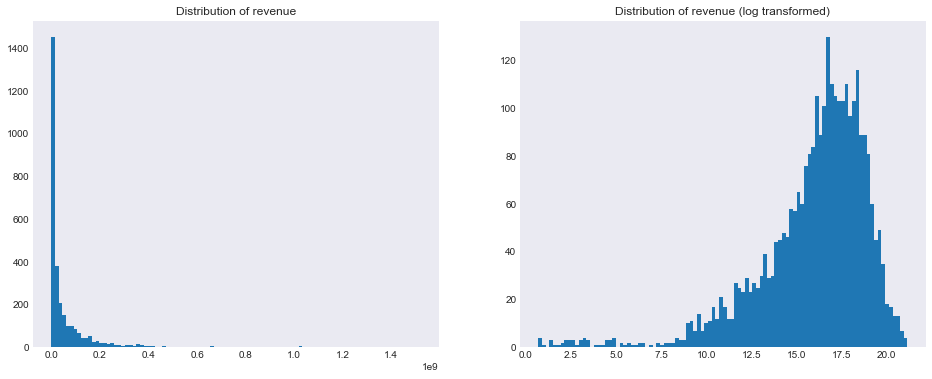

In [4]:
fig, ax = plt.subplots(figsize = (16,6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue'], bins=100);
plt.title('Distribution of revenue')
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']), bins=100);
plt.title('Distribution of revenue (log transformed)')

In [5]:
train['log_revenue'] = np.log1p(train['revenue'])

### Relationship between Film Revenue and Budget

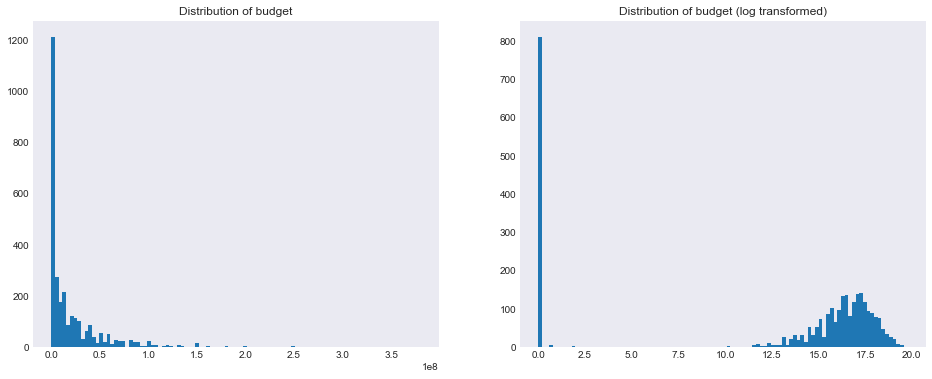

In [32]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget'], bins=100);
plt.title('Distribution of budget')
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']), bins=100);
plt.title('Distribution of budget (log transformed)');

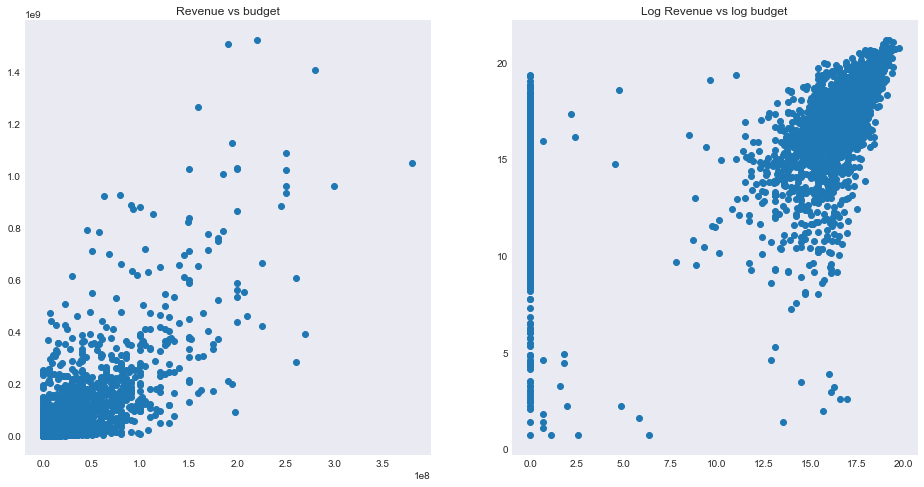

In [7]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget']), train['log_revenue'])
plt.title('Log Revenue vs log budget');

In [8]:
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

### Does having ang Official Homepage Affect Revenue?

In [9]:
train['homepage'].value_counts().head()

http://www.transformersmovie.com/    4
http://www.thehobbit.com/            2
http://www.lordoftherings.net/       2
http://www.us.movie.tintin.com/      1
http://www.westiswest.ca/            1
Name: homepage, dtype: int64

In [10]:
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

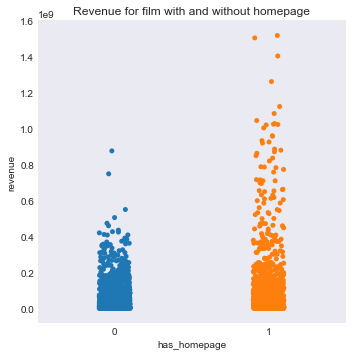

In [11]:
sns.catplot(x='has_homepage', y='revenue', data=train)
plt.title('Revenue for film with and without homepage');

### Distribution of languages in Film

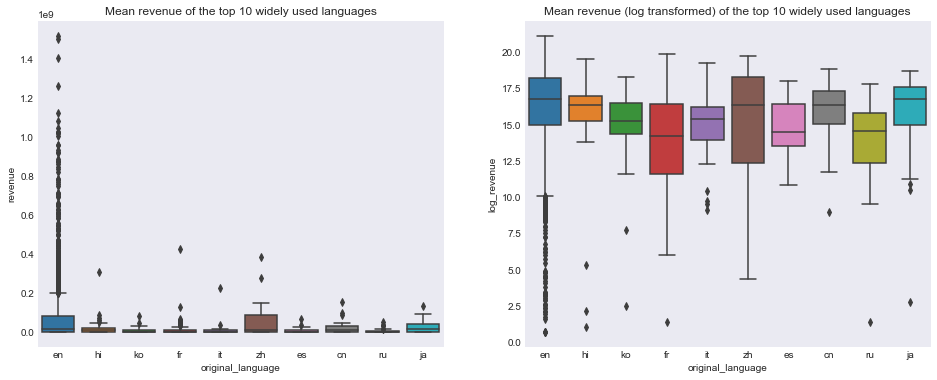

In [12]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=train[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue of the top 10 widely used languages')
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=train[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue (log transformed) of the top 10 widely used languages');

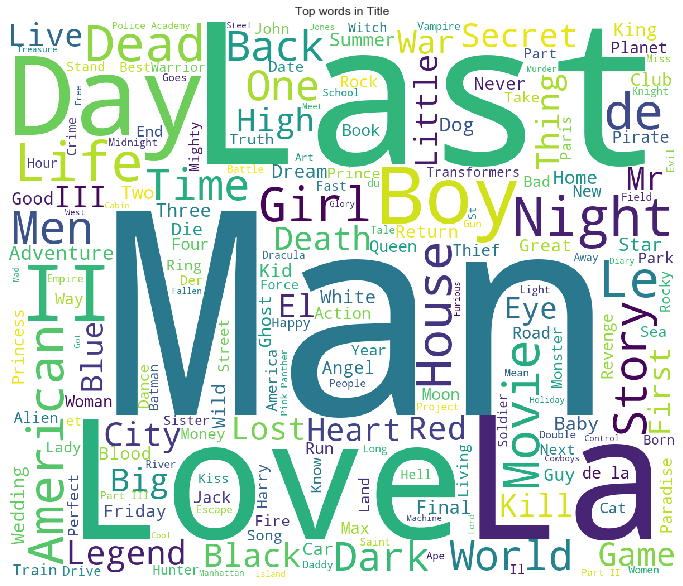

In [13]:
plt.figure(figsize = (12,12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in Title')
plt.axis('off')
plt.show();

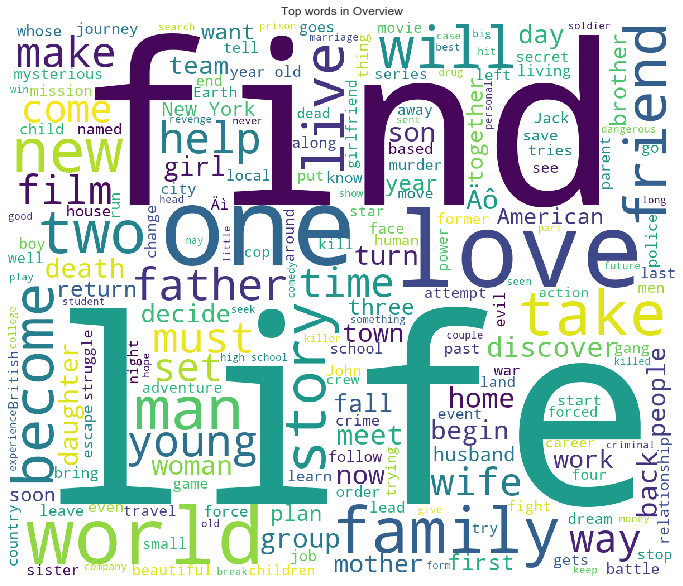

In [14]:
plt.figure(figsize = (12,12))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in Overview')
plt.axis('off')
plt.show();

### Do Film Descriptions Impact Revenue?

In [15]:
import eli5

vectorizer = TfidfVectorizer(sublinear_tf=True,
                             analyzer='word',
                             token_pattern=r'\w{1,}',
                             ngram_range=(1, 2),
                             min_df=5)

overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression().fit(overview_text, train['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

In [16]:
print('Target value:', train['log_revenue'][1000])
eli5.show_prediction(linreg, doc=train['overview'].values[1000], vec=vectorizer, top=10)

Target value: 16.44583954907521


# Feature Engineering

## Analyzing Release Date Column

In [17]:
test.loc[test['release_date'].isnull() == False, 'release_date'].head()

0    7/14/07
1    5/19/58
2    5/23/97
3     9/4/10
4    2/11/05
Name: release_date, dtype: object

In [18]:
def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [19]:
test.loc[test['release_date'].isnull() == True].head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer

In [20]:
test.loc[test['release_date'].isnull() == True, 'release_date'] = '05/01/00'

In [21]:
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

In [22]:
train['release_date'].head()

0     2/20/2015
1      8/6/2004
2    10/10/2014
3      3/9/2012
4      2/5/2009
Name: release_date, dtype: object

### creating featured base on release date

In [23]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [24]:
def date_process(df):
    # all the attributes we want to create from the datetime format
    date_parts = ['year', 'weekday', 'month', 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + ' ' + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    return df


train = date_process(train) 
test = date_process(test)

### Visualize the number of films per year

In [35]:
df1 = train['release_date year'].value_counts().sort_index()
df2 = test['release_date year'].value_counts().sort_index()

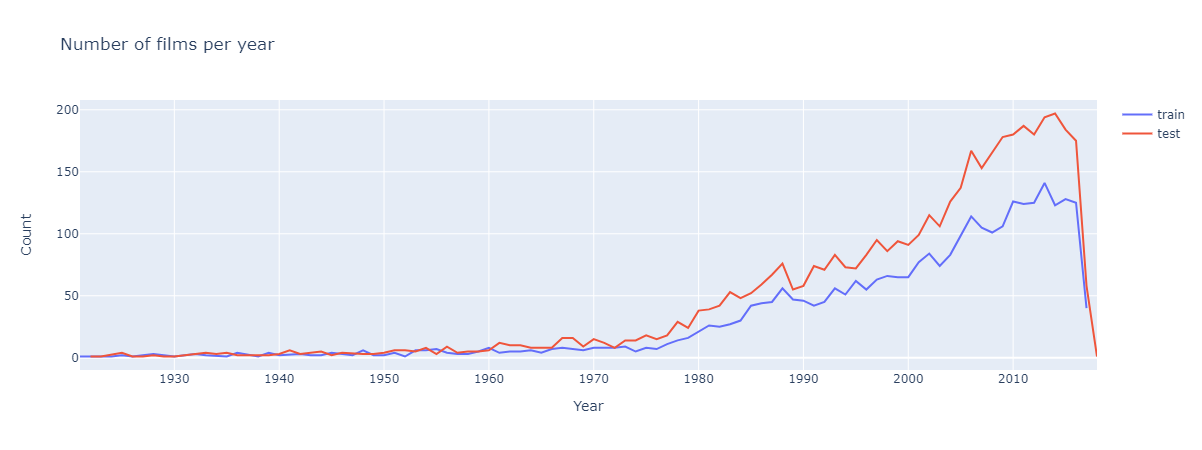

In [36]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# x values are years, and y values are movie counts, name=legend
data = [go.Scatter(x=df1.index, y=df1.values, name='train'),
        go.Scatter(x=df2.index, y=df2.values, name='test')]

layout = go.Layout(dict(title = "Number of films per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

### Number of films and revenue per year

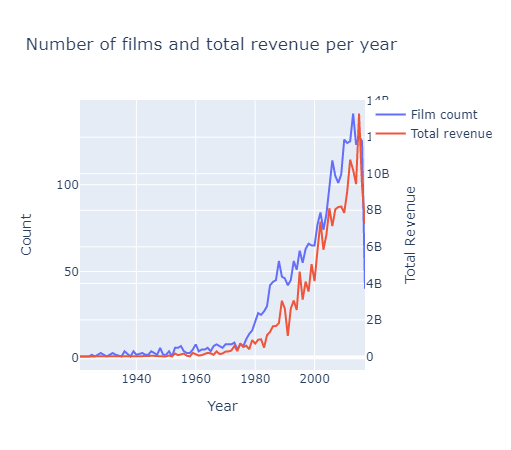

In [40]:
df1 = train['release_date year'].value_counts().sort_index()
df2 = train.groupby(['release_date year'])['revenue'].sum()

data = [go.Scatter(x=df1.index, y=df1.values, name='Film coumt'),
        go.Scatter(x=df2.index, y=df2.values, name='Total revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and total revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2 = dict(title='Total Revenue', overlaying='y', side='right')), legend=dict(orientation='v'))
py.iplot(dict(data=data, layout=layout))

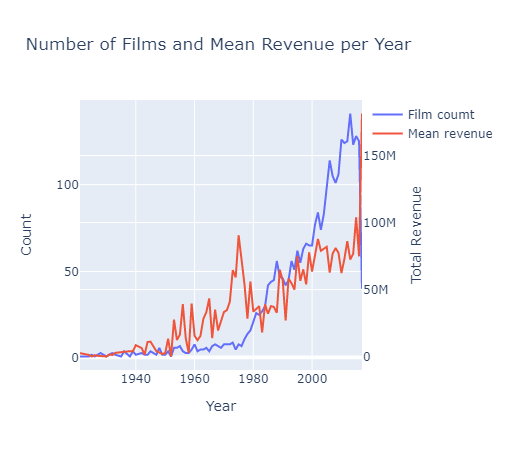

In [39]:
df1 = train['release_date year'].value_counts().sort_index()
df2 = train.groupby(['release_date year'])['revenue'].mean()

data = [go.Scatter(x=df1.index, y=df1.values, name='Film coumt'),
        go.Scatter(x=df2.index, y=df2.values, name='Mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of Films and Mean Revenue per Year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2 = dict(title='Total Revenue', overlaying='y', side='right')), legend=dict(orientation='v'))
py.iplot(dict(data=data, layout=layout))

### Do release days impact revenue?

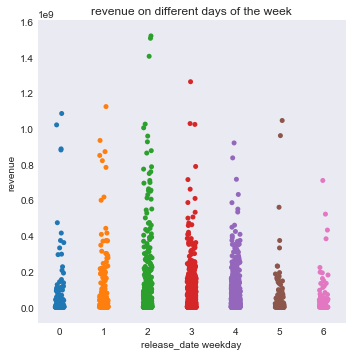

In [43]:
sns.catplot(x='release_date weekday', y='revenue', data=train)
plt.title('revenue on different days of the week');

### Relationship between runtime and revenue

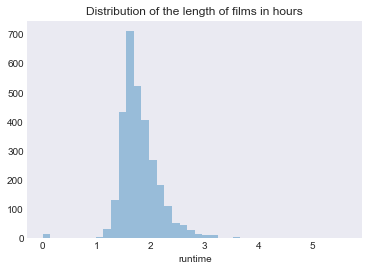

In [56]:
sns.distplot(train['runtime'].fillna(0) / 60, bins=40, kde=False)
plt.title('Distribution of the length of films in hours');

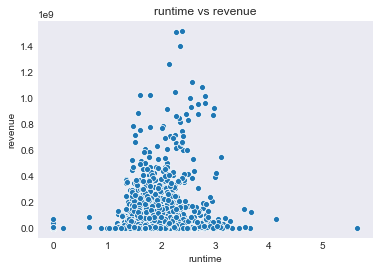

In [54]:
sns.scatterplot(train['runtime'].fillna(0) / 60, train['revenue'])
plt.title('runtime vs revenue');